# **Project Name**    - **Yes Bank Stock Closing Price Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual

#**Project Summary**

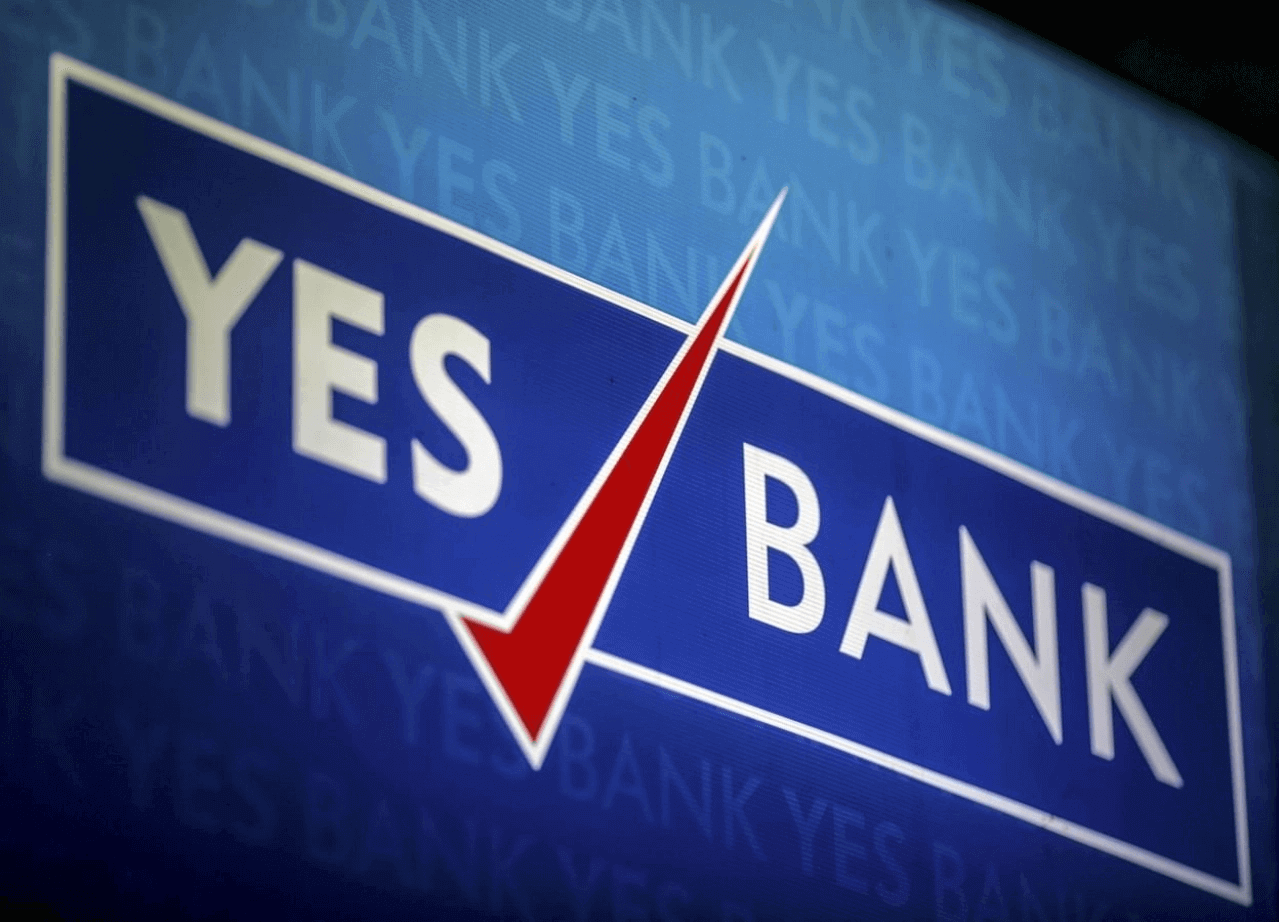

The Yes Bank Stock Closing Price Prediction project was a comprehensive undertaking conducted independently, focusing on analyzing and predicting the closing prices of Yes Bank stocks. The exploration began with a thorough examination of the provided dataset, named data_YesBank_StockPrices.csv. This dataset was found to contain crucial information related to Yes Bank stocks, including high and low prices, the opening price, and the corresponding dates for each stock value. Recognizing the significance of these details for stock price prediction, the initial steps involved data analysis and preprocessing.

Upon inspecting the dataset, it was reassuring to discover the absence of null and duplicate values. However, the datatype of the 'Date' variable was identified as an object, which was not conducive for time-series data analysis. Consequently, the datatype was modified to DateTime to facilitate accurate temporal analysis. To preserve the original dataset, a copy was created, allowing for subsequent transformations without affecting the integrity of the initial data.

Exploratory Data Analysis (EDA) played a pivotal role in unraveling essential insights from the dataset. Various data visualization techniques, including scatter plots, box plots, line plots, bar plots, and distribution plots, were employed to gain a deeper understanding of the data distribution and relationships between variables. Notably, strong linear correlations were observed among the independent variables (Open, High, Low) with the dependent variable (Close). Additionally, all variables exhibited positive skewness, prompting the application of transformation techniques to normalize the data distribution. Despite the presence of outliers, the decision was made to retain them, acknowledging that removing outliers from a relatively small dataset could result in data loss. The impact of outliers would be addressed through subsequent transformations.

The issue of multicollinearity among independent variables was addressed by introducing a new feature termed "independent_mean," derived from the mean of Open, High, and Low variables. Hypothesis testing was conducted based on the analyzed data, yielding p-values to assess the validity of the formulated hypotheses. To enhance the dataset, lag features were introduced, contributing additional dimensions for model training.

Subsequent to data preparation, scaling was performed using the StandardScaler, and the dataset was divided into training and testing sets. Adhering to empirical studies recommending a 80/20 ratio for training and testing, 80% of the data was allocated for training the models, while 20% was reserved for testing.

With the data ready for modelling, various regression models, including Linear Regression, Lasso, and Ridge Regularization, were implemented initially. Subsequently, Random Forest and Support Vector Regressor models were introduced. Hyperparameter tuning was conducted for each model to optimize their performance. Evaluation metrics such as R2 (R Square), MAE (Mean Absolute Error), and RMSE (Root Mean Square Error) were employed to assess and compare the performance of each model. The ultimate objective was to identify the most effective model for predicting Yes Bank stock closing prices based on the given dataset.

# **GitHub Link -**

https://github.com/Shubhangi-Tiwari/Yes-Bank-Stock-Closing-Price-Prediction---Regression-

# **Problem Statement**


**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np                                               #numerical computation
from numpy import math                                           #for mathematical operation
import pandas as pd                                              #for data analysis
import seaborn as sns                                            #data visualization library
import matplotlib.pyplot as plt                                  #plotting library
%matplotlib inline

from sklearn.preprocessing import StandardScaler                #for scaling
from sklearn.model_selection import train_test_split            #train-test split
from sklearn.model_selection import GridSearchCV                #for hyperparameter tuning
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression               #Linear Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV                  #Regularization model
from sklearn.linear_model import Lasso, LassoCV
from sklearn import metrics                                      #Evaluation Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor               #Random Forest Regressor model
from sklearn.tree import export_graphviz                         #For model explainability
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')                                #Ignore warnings

### Dataset Loading

In [ ]:
# Load Dataset
#Mounted Drive to load datset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing dataset
file_location= '/content/drive/MyDrive/data_YesBank_StockPrices.csv'
bank_dataset=pd.read_csv(file_location)

### Dataset First View

In [ ]:
# Dataset First Look
bank_dataset.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bank_dataset.shape

### Dataset Information

In [ ]:
# Dataset Info
bank_dataset.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
bank_dataset.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bank_dataset.isna().sum()

In [ ]:
# Visualizing the missing values
#There is no missing value
sns.heatmap(bank_dataset.isnull())

### What did you know about your dataset?


The dataset consist of total 185 rows and 5 columns. Column names are Close, Open, High, Low and Date respectively. There are no categorial column in the data, all variables have numeric values. There are no duplicate and null values in dataset.Variables such as Close, High, Low and Open are of float datatype whereas Date is of object datatype thats the only variable datatype that needs to be change.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bank_dataset.columns

In [ ]:
# Dataset Describe
bank_dataset.describe(include='all')

### Variables Description

Date - **Date of record**

Open- **Opening price of the stock**

High- **Highest price in the day for stock**

Low- **Lowest price in the day for stock**

Close - **Closing price for the stock**


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in bank_dataset.columns.tolist():
    print ('No. of unique values of', i,'is', bank_dataset[i].nunique())


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df= bank_dataset.copy()

In [ ]:
#Changing format of date column in proper date format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [ ]:
#Viewing the change dataset
df.info()
df.head(2)

In [ ]:
#Changing datatype of date column
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df.info()

### What all manipulations have you done and insights you found?

As dataset had no null and duplicate value so no column or row were removed. Created a copy of original dataset so that I can work with data without affecting the original data, or work with a subset of the data from a DataSet. Changed the datatype of Date variable into datetime datatype and also changed the format of date in the dataset.Further we will visualize chart to view relationship between variable and understand data more efficiently.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
#Checking relation between closing price(dependent variable) and open price(independent variable)
plt.figure(figsize=(15,6))
sns.scatterplot(data= df,x='Open',y='Close',palette='husl')
plt.title('Scatter plot of Closing price with respect to Open price')
plt.show()

##### 1. Why did you pick the specific chart?

I choosed this specific chart to check the relation between independent variable (Open) and dependent variable (Close).

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart help us to understand that there is linear relationship between Close and Open variable, also there are some outliers after 250 which does not follow the general trend pattern. It is clear from graph that there is outlier present which needs to be handled.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definitely it will help us understand how the independent and dependent variable are related to each other and help to visualize how one variable affect the other variable.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
#Checking relation between closing price and respective dates
plt.scatter(df['Date'], df['Close'], alpha=0.5)
plt.title('Scatter plot of Closing Price with Date')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

##### 1. Why did you pick the specific chart?

I choosed this specific chart to check the relation between independent variable Date with respect to dependent variable of closing price.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart help us to understand the relationship between independent variable Date and dependent variable Close. Also it can be observe that close price increases with respect to date in a linear manner but after 2016 there was tremendous growth in Close price of stocks till 2018 then sudden decrease can be seen in 2020 closing price of stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It shows us how closing price changes with respec to time, it helps us to undertand the pattern of closing price or is there any pattern or anamoly present.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
#Checking relation between closing price and highest price
plt.scatter(df['High'], bank_dataset['Close'], alpha=0.5)
plt.title('Scatter plot of Closing Price with High price')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each member of the dataset gets plotted as a point whose x-y coordinates relates to its values for the two variables.

Thus, I have used the scatter plot to depict the relationship between High price and Closing price of stock.



##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart help us to understand that there is linear relationship between High price and Closing price variable in plot. Also it can be observe that there is outlier present too which does not follow the general trend pattern.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help us to understand how two variables are related to each other either if it has any relation between each other or not.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
#Checking relation between low and close price
plt.scatter(df['Low'], bank_dataset['Close'], alpha=0.5)
plt.title('Scatter plot of Low Price with Closing Price')
plt.xlabel('Low Price')
plt.ylabel('Close')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each member of the dataset gets plotted as a point whose x-y coordinates relates to its values for the two variables.

Thus, I have used the scatter plot to depict the relationship between Low price and Closing price of stock.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart help us to understand that there is linear relationship between Low price and Closing price variable in plot. Also it can be observe that there are few outlier present too which does not follow the general trend pattern.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help us to understand how two variables are related to each other either if it has any relation between each other or not.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# Dependent variable 'Close' checking distribution of dependent variable
plt.figure(figsize=(14,8))
sns.distplot(df['Close'],color='r')

##### 1. Why did you pick the specific chart?

The specific chart is picked to view the distribution of dependent variable which is closing price.

##### 2. What is/are the insight(s) found from the chart?

It is clear from plotted graph that data is not normally distributed, it seems that data is positively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help to understand if data is normally distributed or not, which is really important to know as further transformation depends on how the data is distributed.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# Dependent variable 'Close'after log transformation is applied
plt.figure(figsize=(14,8))
sns.distplot(np.log10(df['Close']),color='r')

##### 1. Why did you pick the specific chart?

To check the distribution after transformation is applied so that distribution can be changed to normal distribution for better results.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart shows that after transformation is applied to variable it seems to be changed and look close to normal distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help us to understand the distribution of variable.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
#Checking skewness in dataset for numeric features
numeric_features =df.describe().columns
for col in numeric_features [0:4]:
  fig=plt.figure(figsize=(8,4))
  ax=fig.gca()
  feature = df[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

To check skewness of all variables(numerical) in data so that best transformation can be applied as per skewness of data(variable)

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart shows us that Open,High,Low and Close all these variables are positively skewed and need trasnformation for further processing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights is quite helpful to understand distribution of variable in better way.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
#As data doesn't have normal distribution using box plot to check for outliers existence in every pricing column
plt.figure(figsize=(8, 6))
df_price = df[['Open', 'High', 'Low']]
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

##### 1. Why did you pick the specific chart?

Box and whisker plots, sometimes known as box plots, are a great chart to use when showing the distribution of data points across a selected measure. These charts display ranges within variables measured. This includes the outliers, the median, the mode, and where the majority of the data points lie in the “box”. I picked this chart to look for the outliers.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart makes it clear that outliers are present in data that needs to be treated.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
#Visualizing box plot with log transformation applied
plt.figure(figsize=(8, 6))
df_price = np.log(df[['Open', 'High', 'Low']])
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

##### 1. Why did you pick the specific chart?

Box and whisker plots, sometimes known as box plots, are a great chart to use when showing the distribution of data points across a selected measure. These charts display ranges within variables measured. This includes the outliers, the median, the mode, and where the majority of the data points lie in the “box”. I picked this chart to have a look at those same variable Open, High and Low after transformation have been applied.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart makes it clear that outliers have been treated after transformation is applied.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
#Creating a new variable based on average of other independent features to compare with dependent variable overall
df['independent_mean']= df[['Open','High','Low']].mean(axis=1).round(2)
df.head()

In [ ]:
#Plotting Graph between independent variable and dependent variable to check linear relationship
fig=plt.figure(figsize=(8,6))
sns.lmplot(data=df,x='independent_mean',y='Close',fit_reg=True)

##### 1. Why did you pick the specific chart?

I picked the specific chart as it is used to plot data and draw regression model fits across grids where multiple plots can be plotted. This function combines FacetGrid and regplot() so to check the linear relationship between mean of all independent variable and dependent variable Close.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart shows the strong linear patternbetween both the independent and dependent variable.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
#Visualizing line chart for Open, High, Low and Close variable with respect to Date
sns.lineplot(data=df,x='Date',y='High')
plt.show()

sns.lineplot(data=df,x='Date',y='Low')
plt.show()

sns.lineplot(data=df,x='Date',y='Open')
plt.show()

sns.lineplot(data=df,x='Date',y='Close')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is a graphical representation of an asset's historical price action that connects a series of data points with a continuous line. The relationship between two sets of data, X and Y, is shown using line plots on a distinct axis.

I picked this chart to compare Open,High,Low and Close with respect to time as line charts are best to view trend over time.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart shows that the Low, High, Open, Close stock price follows the genral trend till 2016 and tremendous increase in stock price is seen after 2016 and minimum stock price is seen to be in 2020.The high peak can be seen for every variable with respect to date.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
#Plotting entire price trend since 2005 to 2020
plt.figure(figsize = (10,5))
plt.plot(df['Date'] , df['Open'] , label = 'Open')
plt.plot(df['Date'] , df['High'] , label = 'High')
plt.plot(df['Date'] , df['Low'], label = 'Low')
plt.plot(df['Date'] , df['Close'], label = 'Close')
plt.legend()

##### 1. Why did you pick the specific chart?

I picked line chart to view price trend for all the variables with respect to time as its best way to look trend over varying time.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the charts shows that stock price is increasing till 2018 but after 2018 price is decreased at very high rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights makes it clear that after 2018 stock price has been decreased tremendously as in problem statement it was already mentioned that fraud case happened in 2018 which impacted business negatively.

#### Chart - 13 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(14,7))
corr=sns.heatmap(df.corr(), vmin=-1, vmax=+1, cmap=None, center=None,annot=True,fmt='.2f', annot_kws={'size': 10}, square=True)

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

The correlation matrix provides us with an indication of how well (or not so well) each feature is correlated with each other.

Thus, I used this correlation heatmap to find correlation between all the variables along with correlation coefficient.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, we can see that Close variable has strong correlation with Open, Low, High variables.
This also creates case of multicollinearity in dataset as independent variables are ighly corelated with each other and have strong corelation with each other.

#### Chart - 14 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical. Plot pairwise relationships in a data-set.

Pairplot is good to visualize multiple variable with the same time and visualize the relation between each variable. It creates scatter and histogram to show relation and skewness of data.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart shows that Open, High, Low and Close variables are strongly related to each other linearly also Open, High, Low and Close variables are positively skewed.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1- Closing Stock Price from year 2005-2015 with respect to year 2016-2020 have significant difference.

Statement 2- There is significant difference in Closing Price between months with high opening prices and in months with low opening prices.

Statement 3- Average closing price is more than 100.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 1- Closing Stock Price from year 2005-2015 with respect to year 2016-2020 have significant difference.

H0 - Closing Stock Price from year 2005-2015 with respect to year 2016-2020 have no significant difference.

H1- Closing Stock Price from year 2005-2015 with respect to year 2016-2020 have significant difference

Significance level - 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
#Setting date as index
df.set_index('Date',inplace=True)

In [ ]:
# Perform Statistical Test to obtain P-Value
#Using z test to find p value
#Setting apla value to 0.05

from scipy import stats
alpha=0.05

#Dividing dataset into two half to find the correct value
#first half and second half
first_half=df['Close'][df.index.year <=2015]
second_half=df['Close'][df.index.year >=2016]

#Need to find means, standard deviation & sample size for the sample
mean1=np.mean(first_half)
std1=np.std(first_half)
n1=len(first_half)
mean2=np.mean(second_half)
std2=np.std(second_half)
n2=len(second_half)

#Calculate the standard error difference between both means
standard_error=np.sqrt ((std1**2/n1)+(std2**2/n2))

#Calculate Z scure using standard error value
z= (mean1-mean2)/standard_error

#Calculate the p value (two tailed)
p_value=2*(1-stats.norm.cdf(abs(z)))

#Significance value of alpha is already set which is 0.05 so comparing p value with z
if p_value < alpha:
  print('Reject the Null Hypothesis as it is evident that there is significant difference in mean')
else:
  print ('Failed to reject Null Hypothesis as it is evident that there is not significant difference in mean')

##### Which statistical test have you done to obtain P-Value?

Z-statistic test is performed to obtain P-value.

##### Why did you choose the specific statistical test?

I choosed the specific statistical test as sample size is more than 30 and other values like standard deviation can be calculated.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 2- There is significant difference in mean Closing Price between months with high opening prices and in months with low opening prices.

Null Hypothesis (H0): The mean closing prices in months with high opening prices are equal to or lower than the mean closing prices in months with low opening prices.

Alternative Hypothesis (HA): The mean closing prices in months with high opening prices are higher than the mean closing prices in months with low opening prices.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

#Calculating the mean opening and closing prices for each month
df['Month'] = df.index.strftime('%Y-%m')
monthly_data = df.groupby('Month').agg({'Open': 'mean', 'Close': 'mean'})

# Setting a threshold for high and low opening prices
threshold = monthly_data['Open'].median()

#Now Dividing the data into groups low and high opening prices based on threshold value of opening value
high_opening_prices = monthly_data[monthly_data['Open'] > threshold]['Close']
low_opening_prices = monthly_data[monthly_data['Open'] <= threshold]['Close']

# Calculating the mean,standard deviation & size for sample
mean_high = np.mean(high_opening_prices)
mean_low = np.mean(low_opening_prices)
std_high = np.std(high_opening_prices)
std_low = np.std(low_opening_prices)
n_high = len(high_opening_prices)
n_low = len(low_opening_prices)

# Calculate the z-statistic
z_statistic = (mean_high - mean_low) / np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the p-value
p_value = 1 - stats.norm.cdf(z_statistic)
# Set the significance level
alpha = 0.05

# Now Comparing the p-value with the significance level
if p_value < alpha:
 print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
 print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")

#Using independent t test as well
t_statistic,p_value=stats.ttest_ind(low_opening_prices, high_opening_prices)
#Setting Significance value alpha
alpha=0.05

# Compare the p-value with the significance level
if p_value < alpha:
  print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")

##### Which statistical test have you done to obtain P-Value?

Z and T test are used to obtain P-value.

##### Why did you choose the specific statistical test?

The specific statistical z test is used as the sample size is larger than 30 and independent t test is used as to compare two different means of sample.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 3- Average closing price is more than 100.

H0- Average closing price is less than or equal to 100.

H1- Average closing price is more than 100.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
df['Year'] = df.index.strftime('%Y')
close_data = df.groupby('Month').agg({'Close': 'mean'})

#Dividing data into groups based on closing price
avg_closing_price = close_data[close_data['Close'] > 100]['Close']
avg_closing_price2 = close_data[close_data['Close'] <= 100]['Close']

#Calculating mean, standard deviation & size of samples
mean_avg_closing_price = np.mean(avg_closing_price)
mean_avg_closing_price2 = np.mean(avg_closing_price2)
std_avg = np.std(avg_closing_price)
std_avg2 = np.std(avg_closing_price2)
n_avg = len(avg_closing_price)
n_avg2 = len(avg_closing_price2)

# Calculate the z-statistic
z_statistic = (mean_avg_closing_price - mean_avg_closing_price2) / np.sqrt((std_avg**2 / n_avg) + (std_avg2**2 / n_avg2))

# Calculate the p-value
p_value = 1 - stats.norm.cdf(z_statistic)
# Set the significance level
alpha = 0.05

# Now Comparing the p-value with the significance level
if p_value < alpha:
 print("Reject the null hypothesis. There is a significant evident that mean closing prices are more than 100")
else:
 print("Fail to reject the null hypothesis. There is no significant evidence that mean closing prices are more than 100")

  #second half first_half = ds1['Close'][ds1.index.year <= 2017]

##### Which statistical test have you done to obtain P-Value?

Z test have been used to obtain p-value.

##### Why did you choose the specific statistical test?

The specific statistical test is used as sample size is larger than 30.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
'''There is no missing values in dataset'''

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were no missing values in dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
'''Outliers have been treated by transformation so no need to treat outliers.As dataset was small and there are few columns only no outliers were directly removed.'''

##### What all outlier treatment techniques have you used and why did you use those techniques?

As dataset was small and there were only few columns so outliers were not removed directly instead outliers were treated using log transformation.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#There are no categorical columns in this dataset hence skipping this step

#### What all categorical encoding techniques have you used & why did you use those techniques?

There are no categorical columns in this dataset hence skipping this step

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#As with correlation chart it was clear that all independent variables have strong relation with dependent variable
#Hence created a new feature using mean of all independent variables named it as independent_mean

#Also created two new variable(feature) named as Month and Year extracted from Date index
df.head() #Viewing the new added feature

In [ ]:
#Showing distribution for independent_mean variable
sns.displot(df['independent_mean'])

In [ ]:
#Applying log transform on new feature
x=np.log10(df['independent_mean'])
sns.displot(x)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
#Using lags as additional features
for i in range(1, 14):
    df["lag_{}".format(i)] = df.independent_mean.shift(i)

In [ ]:
#Viewing correlation using heatmap between features
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())
plt.title('Corelation Heatmap')
plt.show()

In [ ]:
'''#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.df()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)'''

In [ ]:
#Dividing the variable as independent and dependent for further transformation
y_depend = df.dropna().Close.values
x_independ = df.dropna().drop(['Close','Open','High','Low','Month','Year'], axis=1)

##### What all feature selection methods have you used  and why?

Feature Engineering is the method used for feature selection, using feature engineering new features like "Independent Mean' was created using Open, High and Low variable as there three independent column had really strong correlation.

Extracted new column named as 'Year' and 'Month' from the index Date.

Also added dummy variables using lag function.

##### Which all features you found important and why?

Independent Mean which is the new feature created by taking mean of Open, High and Low variable is important as this one variable to enough with respect to dependent variable, also it has strong corelation with dependent variable.

Month and Year variable extracted from index Date are also significant as they had good corelation wiith dependent variable.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#Transforming independent variable
x_independ['independent_mean']=np.log10(x_independ['independent_mean'])

#Transforming dependent variable data
Y=np.log10(y_depend)

Yes, the data needs to be transformed as we already observed in distribution chart that data is positively skewed so transformation is must to make the data close to Normal distribution.

I have used log transformation as data was positively skewed.

### 6. Data Scaling

In [ ]:
# Scaling your data
#For Scaling, using StandardScalar
scaler= StandardScaler()
#Applying fit-transform to data
x_scaled=scaler.fit_transform(x_independ.values)

##### Which method have you used to scale you data and why?

StandardScaler method is used to scale the data as data needs to be normalize before performing any machine learning model as feature may have different range which would make it difficult to compare with each other hence StandardScaler standardize the input data in a way that ensures that the data points have a balanced scale.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not needed as it is used to reduce number of features but in this dataset features are already less so no dimensionality reduction was used.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality reduction is used to reduce number of features but in this dataset features are already less so no dimensionality reduction was used.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Spliting data into train and test sets, this will be done using train test split,taking ratio as 80/20
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state = 1)
print(x_train.shape)
print(x_test.shape)


##### What data splitting ratio have you used and why?

80/20 ratio is used for splitting data, I have used this ratio because studies show that the best results are obtained if we use 20-30% of the data for testing, and the remaining 70-80% of the data for training.As my dataset was not large enough so I preferred using 80/20 ratio.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the dataset is not imbalanced

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

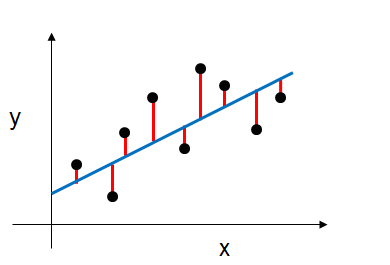

In [ ]:
#Creating dataframe for evaluation metrics
e_metrics_df = pd.DataFrame({'metrics' : ['MAE','MSE', 'RMSE','R2_score', 'adjusted_r2']})

In [ ]:
# ML Model - 1 Implementation of Linear Regression model
reg= LinearRegression()

# Fit the Algorithm
reg.fit(x_train, y_train)

#Calculating score for train and test data
reg.score(x_train, y_train)

reg.coef_

# Predict on the model
y_train_pred= reg.predict(x_train)
y_test_pred= reg.predict(x_test)

print(f'Training Score : {reg.score(x_train,y_train)}')
print(f'Testing Score : {reg.score(x_test,y_test)}')


In [ ]:
from sklearn.metrics import mean_squared_error

#Evaluating metric scores for both train and test data
print('Metrics for Train Data is as follows:')
print('\n')
train_MAE = mean_absolute_error(10**(y_train),(10**y_train_pred))
print(f"Mean Absolute Error : {train_MAE}")

train_MSE  = mean_squared_error(10**(y_train), 10**(y_train_pred))
print("MSE :" , train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("RMSE :" ,train_RMSE)

train_r2 = r2_score(10**(y_train), 10**(y_train_pred))
print("R2 :" ,train_r2)

train_adjusted_r2=1-(1-r2_score(10**(y_train), 10**(y_train_pred)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2)
print('\n')

print('Metrics for Test Data is as follows:')
print('\n')

MAE = mean_absolute_error(10**(y_test),(10**y_test_pred))
print(f"Mean Absolute Error : {MAE}")

MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred))
print("R2 :" ,r2)

adjusted_r2=1-(1-r2_score(10**(y_test), 10**(y_test_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2)




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
metrics=['MAE','MSE','RMSE','R2','Adjusted R2']
metrics_score=[MAE,MSE,RMSE,r2,adjusted_r2]
plt.figure(figsize=(12,6))
plt.plot(metrics,metrics_score,color='green', linewidth = 3,marker='o', markerfacecolor='red', markersize=12)
plt.xlabel=('Evaluation Metrics')
plt.ylabel=('Metrics Scores')
plt.title=('Visualization of Evaluation Metrics')
plt.show()

In [ ]:
#Visualizing actual and predicted values
plt.figure(figsize=(8,5))
plt.plot(10**(y_test_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
'''from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, x_train, y_train, scoring='r2', cv=5)
scores

# Fit the Algorithm
len(x_train.Columns)'''

# Predict on the model
cv_results = cross_validate(reg, x_train, y_train, scoring='r2', cv = 5, return_train_score=True)

print(f"\nThe CV test_Score : {cv_results['test_score']}")
print(f"Mean cross-validation score : {cv_results['test_score'].mean()}\n")

In [ ]:
#Visualizing Cross Validation Performance chart
plt.figure(figsize=(12,6))
plt.plot(cv_results['train_score'], label = "Training Score", marker='o', markersize=5, color = 'r', linewidth=2)
plt.plot(cv_results['test_score'], label = "Cross Validation Score", marker='o', markersize=5, color = 'b', linewidth=2)
plt.tight_layout()
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Cross Validation is used as hyperparameter optimization technique as dataset was small, also more accurate measure of model quality is obtained, which is especially important if making a lot of modeling decisions.

### ML Model - 2 - Lasso and Ridge Regularization Model

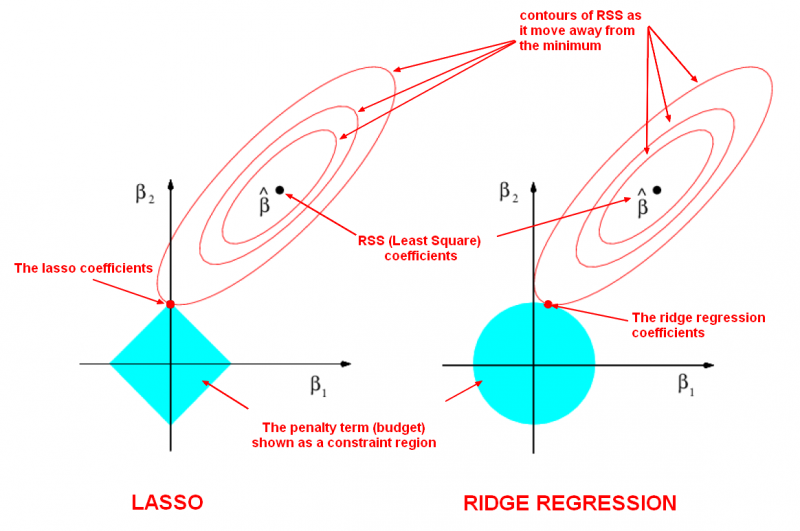

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

# Fit the Algorithm
lasso.fit(x_train, y_train)

lasso.score(x_train, y_train)

# Predict on the model
y_pred_las_test = lasso.predict(x_test)
y_pred_las_train= reg.predict(x_train)

print(f'Training Score : {lasso.score(x_train,y_train)}')
print(f'Testing Score : {lasso.score(x_test,y_test)}')


In [ ]:
#Evaluating metric scores
MAE_lasso = mean_absolute_error(10**(y_test),(10**y_pred_las_test))
print("MAE :" , MAE_lasso)

MSE_lasso  = mean_squared_error(10**(y_test), 10**(y_pred_las_test))
print("MSE :" , MSE_lasso)

RMSE_lasso = np.sqrt(MSE_lasso)
print("RMSE :" ,RMSE_lasso)

r2_lasso = r2_score(10**(y_test), 10**(y_pred_las_test))
print("R2 :" ,r2_lasso)

adjusted_r2_lasso=1-(1-r2_score(10**(y_test), 10**(y_pred_las_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :", adjusted_r2_lasso)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
metric_lasso=['MAE','MSE','RMSE','R2','Adjusted R2']
metrics_score_las=[MAE_lasso,MSE_lasso,RMSE_lasso,r2_lasso,adjusted_r2_lasso]
plt.figure(figsize=(12,6))
plt.plot(metric_lasso,metrics_score_las,color='blue', linewidth = 3,marker='o', markerfacecolor='red', markersize=12)
plt.xlabel=('Evaluation Metrics')
plt.ylabel=('Metrics Scores')
plt.title=('Visualization of Evaluation Metrics')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=10)
# Fit the Algorithm
lasso_regressor.fit(x_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " r2 score is: ", lasso_regressor.best_score_)


# Predict on the model
y_pred_lasso = lasso_regressor.predict(x_test)

#Visualizing Actual vs Prediction values for Lasso
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#Evaluating metric scores for Lasso
MAE_lasso_cv = mean_absolute_error(10**(y_test),(10**y_pred_lasso))
print("MAE :" , MAE_lasso_cv)

MSE_lasso_cv  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE_lasso_cv)

RMSE_lasso_cv = np.sqrt(MSE_lasso_cv)
print("RMSE :" ,RMSE_lasso_cv)

r2_lasso_cv = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2_lasso_cv)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

In [ ]:
# Implementing lasso again with best alpha value which is found by the GridSearch CV
lasso = Lasso(0.01)

# Fit the Algorithm
lasso.fit(x_train, y_train)

print(f'Training Score : {lasso.score(x_train,y_train)}')
print(f'Testing Score : {lasso.score(x_test,y_test)}')

##### Which hyperparameter optimization technique have you used and why?

GridSearchcv hyperparameter optimization technique have been used to search and find the optimal combination of hyperparameters for a given model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The score for testing and training data seems to be almost same after applying GridsearchCV hyperparameter tuning as alpha value obtained is almost same as we used. It gives us a good model considering testing score and r2 square metrics.

### ML Model - Ridge Regression Model

In [ ]:
# ML Model -from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge
ridge  = Ridge()
ridge.fit(x_train, y_train)

# Fit the Algorithm
ridge.fit(x_train, y_train)
ridge.score(x_train, y_train)
# Predict on the model
y_pred_ridge = ridge.predict(x_test)
print(f'Training Score : {ridge.score(x_train,y_train)}')
print(f'Testing Score : {ridge.score(x_test,y_test)}')

In [ ]:
#Evaluating Metric scores
MAE_ridge = mean_absolute_error(10**(y_test),(10**y_pred_ridge))
print("MAE :" , MAE_ridge)

MSE_ridge  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE_ridge)

RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :" ,RMSE_ridge)

r2_ridge = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2_ridge)

adjusted_r2_ridge=1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :", adjusted_r2_ridge)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
metric_ridge=['MAE','MSE','RMSE','R2','Adjusted R2']
metrics_score_rid=[MAE_ridge,MSE_ridge,RMSE_ridge,r2_ridge,adjusted_r2_ridge]
plt.figure(figsize=(12,6))
plt.plot(metric_ridge,metrics_score_rid,color='yellow', linewidth = 3,marker='o', markerfacecolor='red', markersize=12)
plt.xlabel=('Evaluation Metrics')
plt.ylabel=('Metrics Scores')
plt.title=('Visualization of Evaluation Metrics')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
parameters = {'alpha': np.arange(-100,100,0.1)}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(x_train,y_train)
# Fit the Algorithm

# Fit the algorithm
ridge_regressor.fit(x_train, y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

In [ ]:
ridge.score(x_train, y_train)
print(f'Training Score : {ridge.score(x_train,y_train)}')
print(f'Testing Score : {ridge.score(x_test,y_test)}')

In [ ]:
#Predict on the model
y_pred_r = ridge.predict(x_test)

In [ ]:
#Visualizing Actual vs Prediction values for Ridge
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_r))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
e_metrics_df = pd.DataFrame({'Evaluation Metric':['MAE','MSE','RMSE','R2_Score','Adjusted R2'],'Linear Regression':[MAE,MSE,RMSE,r2,adjusted_r2],'Lasso':[MAE_lasso,MSE_lasso,RMSE_lasso,r2_lasso,adjusted_r2_lasso],'Ridge':[MAE_ridge,MSE_ridge, RMSE_ridge,r2_ridge,adjusted_r2_ridge]})

In [ ]:
e_metrics_df

##### Which hyperparameter optimization technique have you used and why?

GridSearchcv hyperparameter optimization technique have been used to search and find the optimal combination of hyperparameters for a given model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

GridSearchCv have been used to pick the value that gives the best score, considering the metric chart from Linear, Lasso and Ridge Regression model, both Lasso and Ridge Regression model have given a good R2 Score also testing score is better than Linear Regression.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R2 Score Evaluation metrics must be considered for choosing a model as R2 score is a metric that tells the performance of model, not the loss in an absolute sense that how many wells did your model perform. In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context.

### ML Model - 3 - Random Forest Regressor

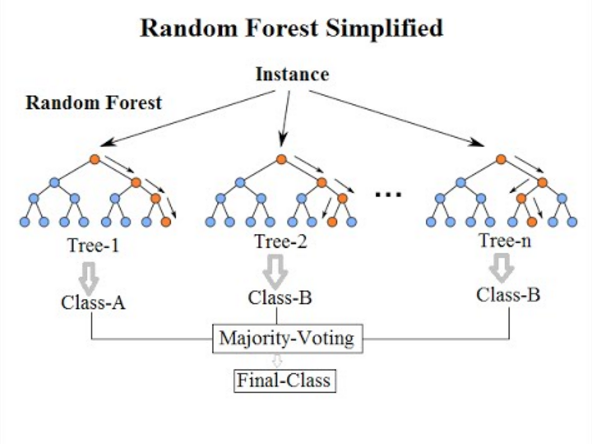

In [ ]:
#Implementation of Random Forest Regressor
ran_for = RandomForestRegressor(random_state=1)

# Fit the algorithm
ran_for.fit(x_train, y_train)

# Predict on the model
y_pred_random = ran_for.predict(x_test)

print(f'Training Score:{ran_for.score(x_train,y_train)} ')
print(f'Testing Score:{ran_for.score(x_test,y_test)}')


In [ ]:
#Evaluating Metric scores
MAE_ran = mean_absolute_error(10**(y_test),(10**y_pred_random))
print("MAE :" , MAE_ran)

MSE_ran  = mean_squared_error(10**(y_test), 10**(y_pred_random))
print("MSE :" , MSE_ran)

RMSE_ran = np.sqrt(MSE_ran)
print("RMSE :" ,RMSE_ran)

r2_ran = r2_score(10**(y_test), 10**(y_pred_random))
print("R2 :" ,r2_ran)

adjusted_r2_ran=1-(1-r2_score(10**(y_test), 10**(y_pred_random)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :", adjusted_r2_ran)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
metric_ran=['MAE','MSE','RMSE','R2','Adjusted R2']
metrics_score_ran=[MAE_ran,MSE_ran,RMSE_ran,r2_ran,adjusted_r2_ran]
plt.figure(figsize=(12,6))
plt.plot(metric_ran,metrics_score_ran,color='green', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel=('Evaluation Metrics')
plt.ylabel=('Metrics Scores')
plt.title=('Visualization of Evaluation Metrics')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# RandomForestRegressor Implementation with GridSearchCV hyperparameter optimization technique
reg_random = RandomForestRegressor()
grid_values = {'n_estimators':[90,95,100,105,110,115,120,130,150,160], 'max_depth':[10,14,18,20,24,26,30,45,50,60]}
regressor_random_for = GridSearchCV(reg_random, param_grid = grid_values, scoring = 'r2', cv=5)
from datetime import datetime
start=datetime.now()

# Fit the Algorithm
regressor_random_for.fit(x_train, y_train)
print(f"The best score : {regressor_random_for} \n")
print(f"The best fit parameters are found out to be : {regressor_random_for.best_params_} \n")
end=datetime.now()
execution_time=round((end -start).seconds/60,2)

print(f'The computational time for finding the best parameters for random forest regressor model: {execution_time} minutes\n')


In [ ]:
# Implementing Optimal Randomforest Model with best parameters
optimal_ran_for = regressor_random_for.best_estimator_
# Fit the Algorithm
optimal_ran_for.fit(x_train, y_train)
print(f'Training Score : {optimal_ran_for.score(x_train,y_train)}')
print(f'Testing Score : {optimal_ran_for.score(x_test,y_test)}')

In [ ]:
#Predict on model
y_pred_random = regressor_random_for.predict(x_test)

In [ ]:
#Visualizing Actual vs Prediction values for Random Forest
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_random))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#Random Forest - Cross Validation R2 Score
cv_results_random = cross_validate(regressor_random_for, x_train, y_train, scoring='r2', cv = 5, return_train_score=True)

print(f"\nThe CV test_Score : {cv_results['test_score']}")
print(f"Mean cross-validation score : {cv_results['test_score'].mean()}\n")

In [ ]:
#Visualizing Cross Validation Performance chart
plt.figure(figsize=(12,6))
plt.plot(cv_results_random['train_score'], label = "Training Score", marker='o', markersize=5, color = 'b', linewidth=2)
plt.plot(cv_results_random['test_score'], label = "Cross Validation Score", marker='o', markersize=5, color = 'g', linewidth=2)
plt.tight_layout()
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Used GridSearchcv hyperparameter optimization technique as dataset was small to go through foldings and find the best parameter for model.

##### Have you seen any improvement?

Random Forest is giving a good result without hyperparameter tuning as got 0.99 Training score and 0.96 testing score.

### ML Model - 4 - Support Vector Regressor

In [ ]:
#Implementation of SVR
from sklearn.svm import SVR
svr = SVR(kernel='rbf')

# Fit the algorithm
svr.fit(x_train, y_train)

# Predict on the model
y_pred_svr = svr.predict(x_test)

print(f'Training Score:{svr.score(x_train,y_train)} ')
print(f'Testing Score:{svr.score(x_test,y_test)}')

In [ ]:
#Evaluating Metric scores
MAE_svr = mean_absolute_error(10**(y_test),(10**y_pred_svr))
print("MAE :" , MAE_svr)

MSE_svr  = mean_squared_error(10**(y_test), 10**(y_pred_svr))
print("MSE :" , MSE_svr)

RMSE_svr = np.sqrt(MSE_svr)
print("RMSE :" ,RMSE_svr)

r2_svr = r2_score(10**(y_test), 10**(y_pred_svr))
print("R2 :" ,r2_svr)

adjusted_r2_svr=1-(1-r2_score(10**(y_test), 10**(y_pred_svr)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :", adjusted_r2_svr)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
metric_ran=['MAE','MSE','RMSE','R2','Adjusted R2']
metrics_score_ran=[MAE_svr,MSE_svr,RMSE_svr,r2_svr,adjusted_r2_svr]
plt.figure(figsize=(12,6))
plt.plot(metric_ran,metrics_score_ran,color='green', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel=('Evaluation Metrics')
plt.ylabel=('Metrics Scores')
plt.title=('Visualization of Evaluation Metrics')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# SupportVectorRegressor Implementation with GridSearchCV hyperparameter optimization technique
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf']}
start = datetime.now()
svr_cv = GridSearchCV(svr, param_grid, scoring='r2', cv=5)

# Fit the Algorithm
svr_cv.fit(x_train, y_train)
print(f"The best score : {svr_cv.best_score_} \n")
print(f"The best parameters : {svr_cv.best_params_} \n")
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational time for finding the best parameters for Support Vector regressor model: {execution_time} minutes\n')


In [ ]:
#Predict on model
y_pred_svr = svr_cv.predict(x_test)

In [ ]:
#Visualizing Actual vs Prediction values for Random Forest
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_svr))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#Support Vector Regressor - Cross Validation R2 Score
cv_results_svr = cross_validate(svr_cv, x_train, y_train, scoring='r2', cv = 5, return_train_score=True)

print(f"\nThe CV test_Score : {cv_results['test_score']}")
print(f"Mean cross-validation score : {cv_results['test_score'].mean()}\n")

In [ ]:
# Implementing Optimal Support Vector Regressor Model with best parameters
optimal_svr = svr_cv.best_estimator_
# Fit the Algorithm
optimal_svr.fit(x_train, y_train)
print(f'Training Score : {optimal_svr.score(x_train,y_train)}')
print(f'Testing Score : {optimal_svr.score(x_test,y_test)}')

In [ ]:
#Visualizing Cross Validation Performance chart
plt.figure(figsize=(12,6))
plt.plot(cv_results_svr['train_score'], label = "Training Score", marker='o', markersize=5, color = 'b', linewidth=2)
plt.plot(cv_results_svr['test_score'], label = "Cross Validation Score", marker='o', markersize=5, color = 'y', linewidth=2)
plt.tight_layout()
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV hyperparameter optimization technique is used as dataset was small so it was convenient to perform gridsearch and find the best value that fits the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, improvement in scores have been seen after implementing Support Vector Regressor tuning.
Testing score have been increased by 1% after tuning.

In [ ]:
# create another dataframe for evaluation metrics
metric_data={'Evaluation Metric':['MAE','MSE','RMSE','R2_Score','Adjusted R2'],'Random Forest':[MAE_ran,MSE_ran,RMSE_ran,r2_ran,adjusted_r2_ran],'Support Vector Regressor':[MAE_svr,MSE_svr,RMSE_svr,r2_svr,adjusted_r2_svr]}
evaluation_metrics_df = pd.DataFrame(metric_data)
evaluation_metrics_df

In [ ]:
#Merging both dataframe to view entire model evaluation metrics
total_evaluation_metrics =pd.merge(e_metrics_df, evaluation_metrics_df)

In [ ]:
#Visualizing all the metrics for all applied models
total_evaluation_metrics

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Linear model is working well as it provided 0.96 score for testing and 0.98 score for training, after tuning linear regression obtained test score is slightly higher as it is 0.97.R2 Score for test data is 0.95 and 0.98 for train data

For Lasso model,training score obtained is 0.98 whereas testing score is 0.97, R2 Score obtained is 0.96 which is very good score for model, after tuning parameter for Lasso there seems to be improvement in R2 Score as it changes to 0.97

For Ridge model, obtained training score is 0.98 whereas testing score is 0.97 which is quite good score for testing data.R2 Square for test data is 0.97

Random Forest model provided the best training score for data which is 0.99 and for testing data score is 0.96. R2 Square score for random forest model is 0.96

Support Vector Regressor model provided the least R2 Square which is 0.90 with training score of 0.97 and testing score of 0.95, after parameter tuning there was an improvement in testing score which changed to 0.96

Considering all the above implemented models,
**Ridge Regression** will be the final prediction model as it is performing better than other models at every aspects with Highest R2 and Adjusted-R2 Score and lowest MAE and RMSE score which means lowest error.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**SHAP (Shapley Additive exPlanations)** is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result. The goal of SHAP is to explain the prediction by computing the contribution of each feature to the final result.

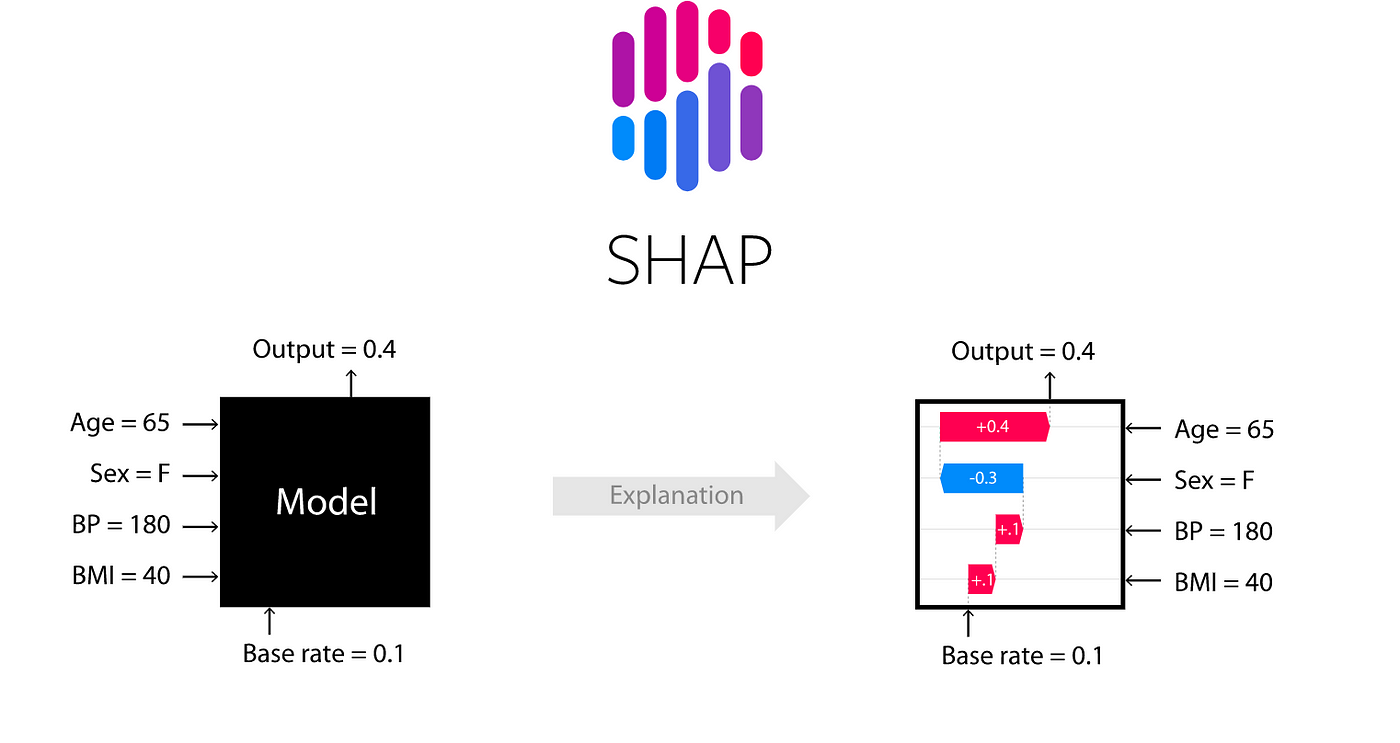

**SHAP Implementation**

In [ ]:
pip install shap

In [ ]:
#After installing shap, import shap
import shap

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()

In [ ]:
# Explaining model's predictions using SHAP values
feature_names=df.dropna().drop(['Close','Open','High','Low','Month','Year'], axis=1).columns
x_shap = x_train
explainer = shap.KernelExplainer(ridge.predict,x_train)
shap_values = explainer.shap_values(x_shap)

In [ ]:
# Forceplot for values
shap.force_plot(explainer.expected_value, shap_values, x_shap)

In [ ]:
#Forceplot for first observation
shap.force_plot(explainer.expected_value, shap_values[0,:], x_shap[0,:], matplotlib = True, feature_names = feature_names)

The baseline for Shapley values is the average of all predictions. Each feature value is a force that either increases or decreases the prediction. Each feature contributing to pushing the model output from the base value to the model output.The above explanation shows feature each contributing to push model output from base value which is the average model output over training dataset that is passed. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

'Independent' feature pushing the base value lower with very high impact.
On the other hand, other features are pushing the price up having impact on prediction but lower than independent feature.

Thus, Shap helps us to understand which feature contributed most towards prediction and which is the most important feature for our model,as per plot we can conclude that Independent mean that is mean of Open,High and Low variable is the most important feature for prediction of model.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The conclusion drawn after entire data cleaning, processing, analysing, visualizing and implementing different machine learning models are as follows:


**Conclusion drawn after Data Analysis and Visualization are:**

1.The dataset consists of stock information in which no null and missing values are present.

2.Independent variable of dataset such as Open, High, Low have strong correlation with each other due to which multicollinearity exists.

3.Open, High and Low variable data are positively skewed data which needs to be transform so that data can be distributed close to normal.

4.Dependent Variable Close is also positively skewed data.

5.Variation in the stock price can be seen since 2008 till 2016 but after 2016 there has been rapid increase in pricing of stocks.

6.Stock price has been increased since 2016 to 2018 but after 2018 stock prices have been decreased continously.

7.Highest price of stock was recorded as 404.0 in month 2018.

8.Lowest price of stock was recorded as 5.55 in month 2020.

9.Independent Variable such as Open,High and Low have strong linear relationship with dependent variable Close.

10.There are some outliers present in the dataset but as the dataset is very small dropping those outliers can lead of data loss.

**Conclusion drawn after Model Implementation:**

For Machine Learning model implementation, Linear Regression, Lasso and Ridge regularization models, Random Forest and Support Vector Regressor have been used.

At first basic implementation started with linear regression model which gave decent training and test score

Then used Lasso and Ridge Regression model and got impressive training and testing score with low MAE and RMSE score compare to the base model.

Implemented Random Forest model which gave better training and testing score compare to any other model

Then finally implemented Support Vector Regressor model which seems to be performing bad as compare to other models with training score and testing score

**Ridge Regression** will be the final prediction model as it is performing better than other models at every aspects with Highest R2 and Adjusted-R2 Score and lowest MAE and RMSE score which means lowest error.

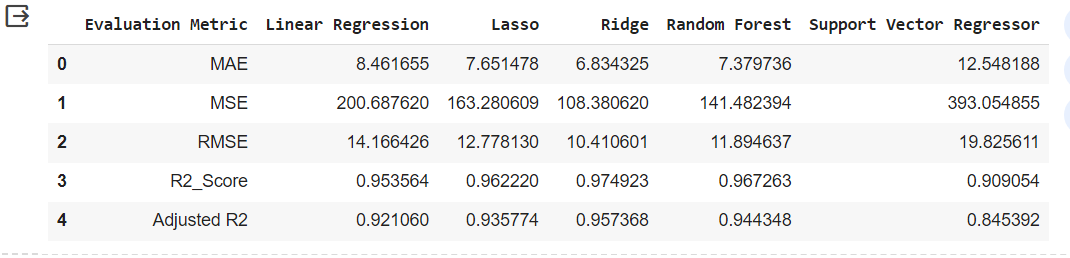

Above picture shows the overall metrics for all the implemented models from which we can conclude the best overall performing model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***